In [44]:
myvars = {}
with open("mgharpur-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [45]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db="I501saptpurkFall22grp_04_db")
cursor = conn.cursor()

In [46]:
cursor.execute("select * from Thyroid_data")

9172

In [47]:
rows=cursor.fetchall()
rows

((29,
  'F',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  't',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  't',
  Decimal('0.300000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'other',
  '-',
  840801013),
 (29,
  'F',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  't',
  Decimal('1.600000'),
  't',
  Decimal('1.900000'),
  't',
  Decimal('128.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'other',
  '-',
  840801014),
 (41,
  'F',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  't',
  'f',
  'f',
  'f',
  'f',
  'f',
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  'f',
  Decimal('0.000000'),
  't',
  Decimal('11.000000'),
  'other',
  '-',
  840801042),
 (36,
  'F',
  'f',
  'f',
 

In [48]:
a=list(rows)

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('always')
#!pip install imblearn
#!pip install git+https://github.com/shakedzy/dython.git
import imblearn
import matplotlib.pyplot as plt

In [50]:
df=pd.DataFrame(a,columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','target','patient_id'])
df.replace(0.000000 ,np.nan , inplace = True)
df = df.astype({'TSH':'float', 'T3':'float' , 'TT4':'float' , 'T4U':'float', 'FTI':'float'})
df.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.000000,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.000000,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.000000,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.000000,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.000000,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,...,116.0,f,NaN,f,NaN,f,NaN,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,...,76.0,f,NaN,f,NaN,f,NaN,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,...,83.0,f,NaN,f,NaN,f,NaN,other,-,840808073


## Data Cleaning Part-1

#### Removing Unnecessary Columns mostly boolean columns which indicates Drug administered or Not, We removed this columns because those were unncessary since we would already know if the drug has been given , how much was it given from the other related columns. For Eg.   If the Drug is given then the boolean value would be 1, but we can also know this information by seeing the amount of drug given which will be 0 If the drug is not administered. Hence we remove those redundant columns.

In [51]:
df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'],axis = 1, inplace=True)

In [52]:
df.describe()
#removing patients with age greater than 120 because maximum age can be seen as 65526.000000
df.drop(df[df['age'] > 120].index, inplace = True)
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.000000,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.000000,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,-
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,-
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,I
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,-


#### Dealing With Target Variable
Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

In [53]:
df['target'].unique()
mapping_target = {'-': 'negative','A': 'hyperthyroid', 'B': 'hyperthyroid','C': 'hyperthyroid', 'D': 'hyperthyroid','E': 'hypothyroid', 'F': 'hypothyroid', 'G': 'hypothyroid', 'H': 'hypothyroid'}
df['target'] = df['target'].map(mapping_target)
df.dropna(subset=['target'] , inplace = True) 
df['target'].unique()
df['target'].value_counts()

negative        6767
hypothyroid      593
hyperthyroid     182
Name: target, dtype: int64

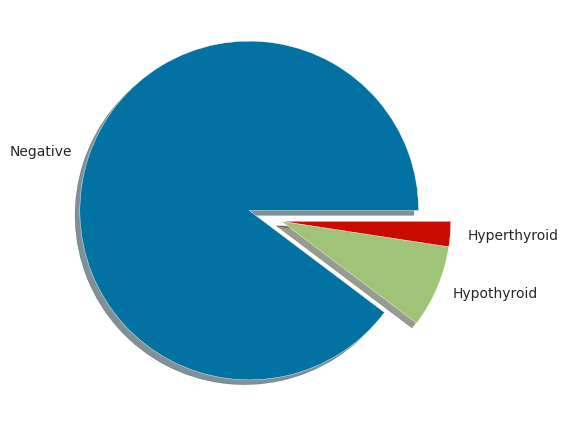

In [54]:
target_count = df['target'].value_counts()
mylabels = ['Negative','Hypothyroid','Hyperthyroid']
myexplode = [0.2, 0, 0]

plt.pie(target_count, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

## Exploratory Data Analysis

#### Plotting Target with respect to different features(mainly Test measurements) in our dataset

In [55]:
import seaborn as sns # deluxe visualization library
import matplotlib.pyplot as plt # visualization library to support seaborn
%matplotlib inline

#### Plotting Continuous Variables ('age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI') against 'target' conditions(hyper vs hypo vs negative)

<AxesSubplot:xlabel='target', ylabel='age'>

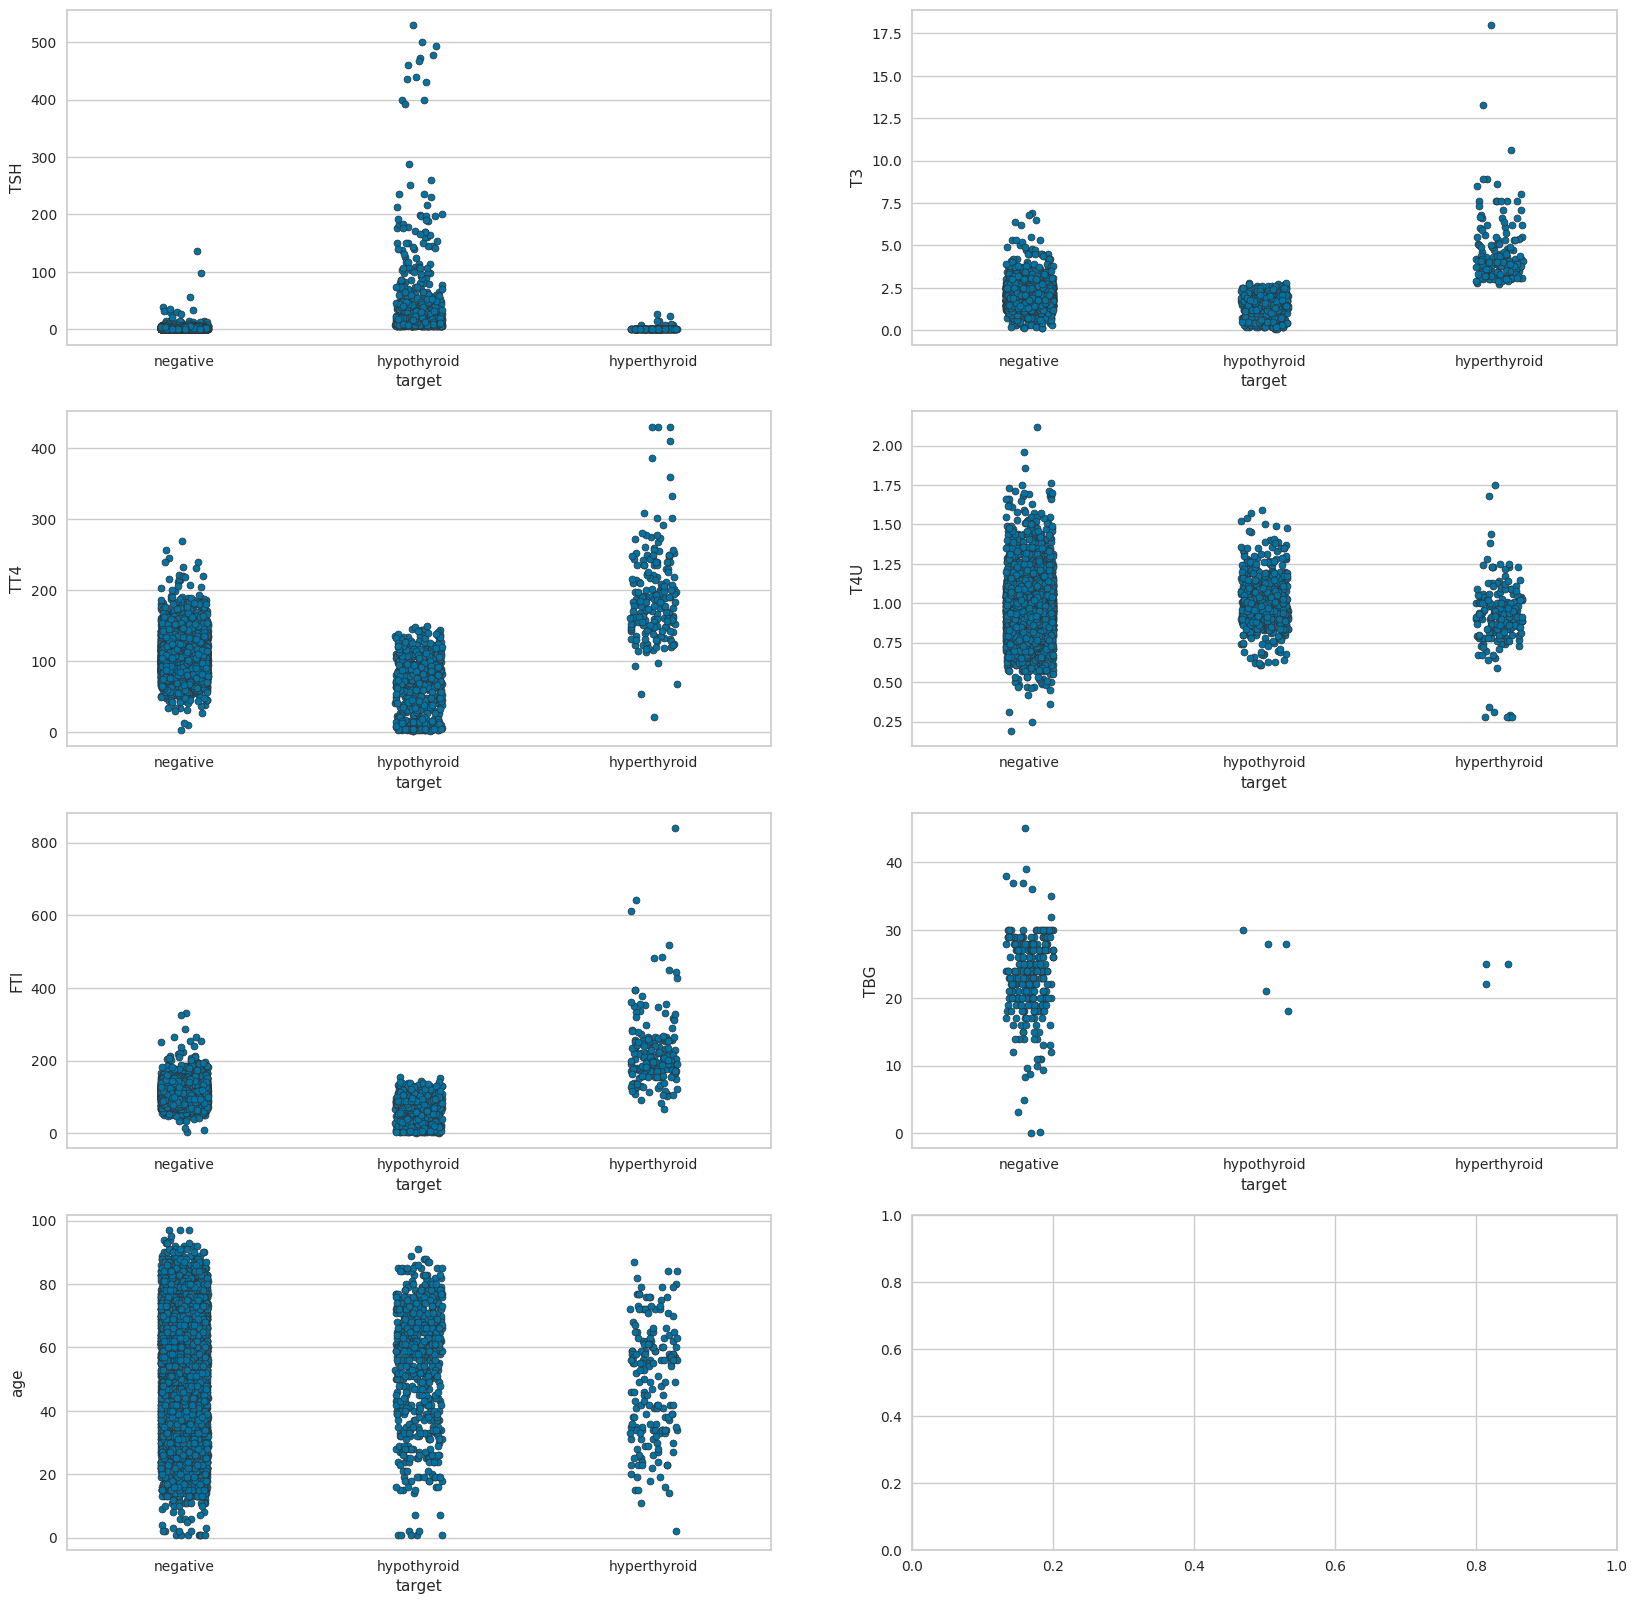

In [56]:
fig, axes = plt.subplots(4 , 2 , figsize = (20,20))
sns.set_style("darkgrid");

sns.stripplot(x = df.target, y = df.TSH , linewidth = 0.5 , jitter = 0.1, ax = axes[0, 0])
sns.stripplot(x = df.target, y = df.T3 , linewidth = 0.5 , jitter= 0.1, ax = axes[0, 1])
sns.stripplot(x = df.target, y = df.TT4 , linewidth = 0.5 , jitter= 0.1, ax = axes[1, 0])
sns.stripplot(x = df.target, y = df.T4U , linewidth = 0.5 , jitter= 0.1, ax = axes[1, 1])
sns.stripplot(x = df.target, y = df.FTI , linewidth = 0.5 , jitter= 0.1, ax = axes[2, 0])
sns.stripplot(x = df.target, y = df.TBG , linewidth = 0.5 , jitter= 0.1, ax = axes[2, 1])
sns.stripplot(x = df.target, y = df.age , linewidth = 0.5 , jitter = 0.1, ax = axes[3, 0])


#### Plotting Correlation between Continuous Variables

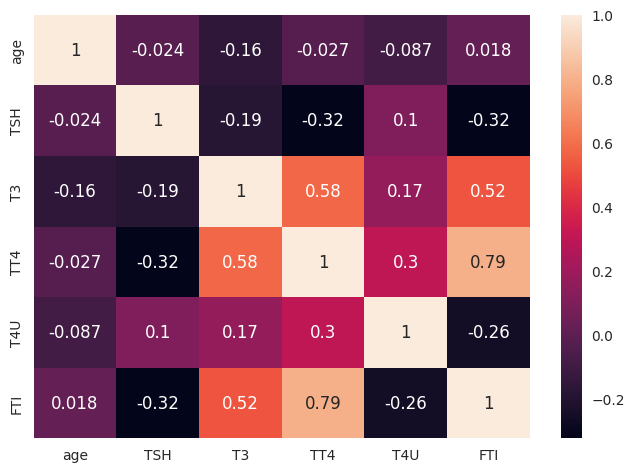

In [57]:
cor_matrix = df.corr()
sns.heatmap(cor_matrix, annot = True)
plt.show()

#### Visualizing Continuous Variables vs Target

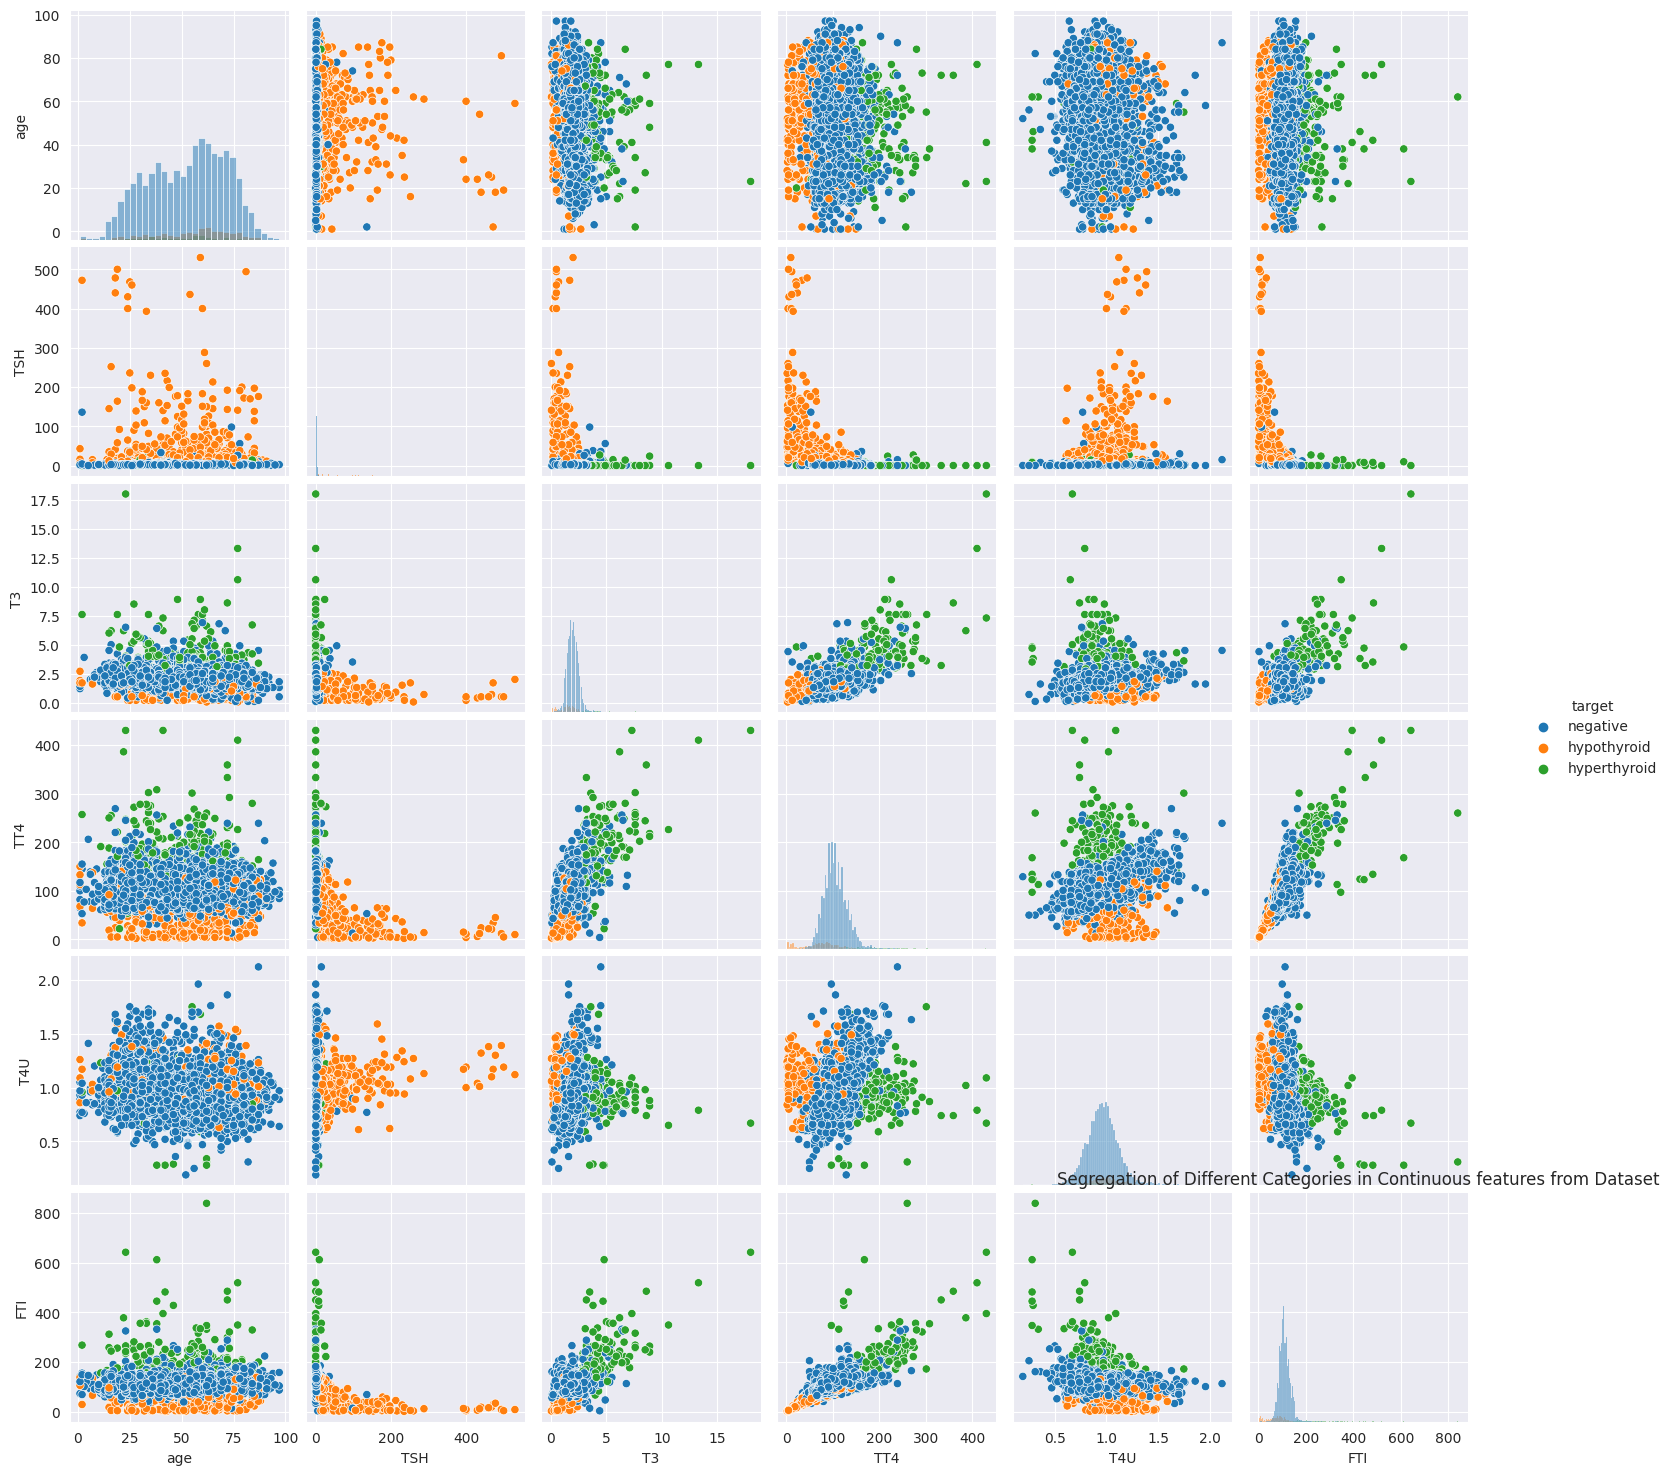

In [101]:
new_df = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.pairplot(new_df, hue = 'target', diag_kind = "hist");
plt.title("Segregation of Different Categories in Continuous features from Dataset")
plt.show()

#### Finding Correlation between Gender and Target Variable

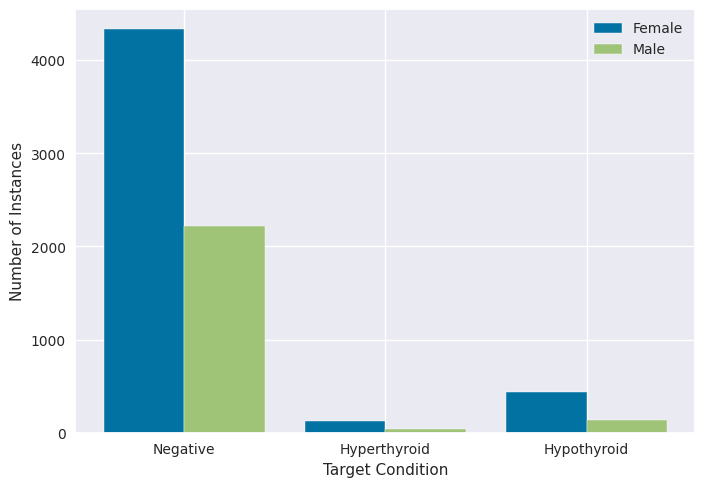

In [58]:
df_female_negative = len(df[(df['sex'] == 'F') & (df['target'] == 'negative') ])
df_female_hyper = len(df[(df['sex'] == 'F') & (df['target'] == 'hyperthyroid') ])
df_female_hypo = len(df[(df['sex'] == 'F') & (df['target'] == 'hypothyroid') ])

df_male_negative = len(df[(df['sex'] == 'M') & (df['target'] == 'negative') ])
df_male_hyper = len(df[(df['sex'] == 'M') & (df['target'] == 'hyperthyroid') ])
df_male_hypo = len(df[(df['sex'] == 'M') & (df['target'] == 'hypothyroid') ])

condition = ['Negative','Hyperthyroid','Hypothyroid']
female = [df_female_negative,df_female_hyper, df_female_hypo]
male = [df_male_negative, df_male_hyper, df_male_hypo]

x_axis = np.arange(len(condition))
plt.bar(x_axis -0.2, female, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male')
plt.xticks(x_axis, condition)
plt.xlabel('Target Condition')
plt.ylabel('Number of Instances')
plt.legend()
plt.show()

#### Dealing with Categorical variables 
('sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'target')

In [59]:
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

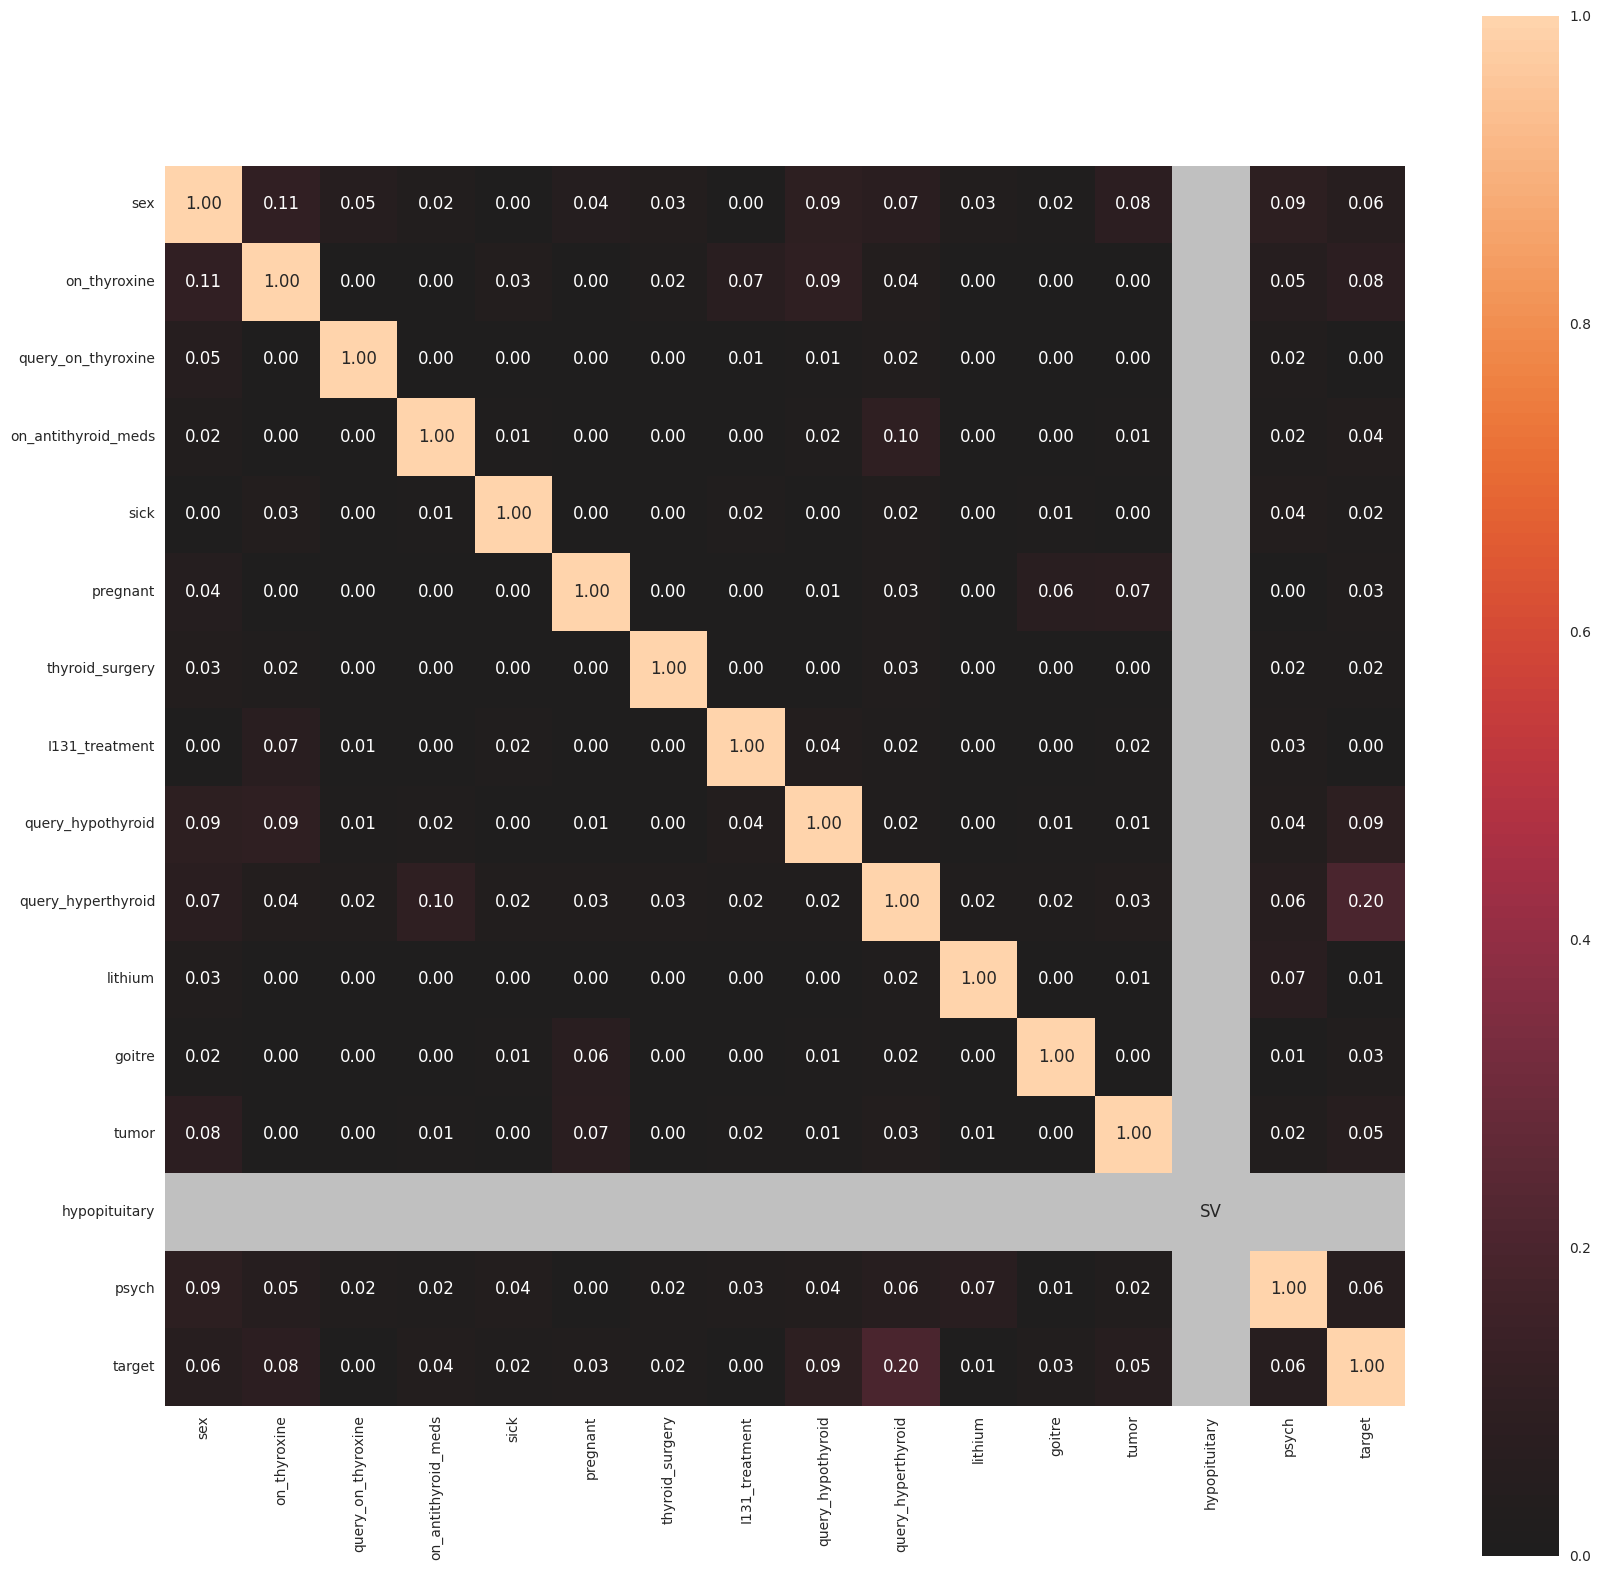

In [60]:
categorical_variables = identify_nominal_columns(df)
categorical_variables

df_categorical_variables = df[['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'target']].copy()

#df_categorical_variables

associations(df_categorical_variables, nominal_columns = 'auto', numerical_columns = None, mark_columns = False ,nom_nom_assoc = 'cramer', num_num_assoc = 'pearson', figsize = (20,20));

####  We can see from the above table that there is very little information or relation among these Categorical variable as compared to Continuous variables.

 ## Data Cleaning Part-2

In [61]:
#Lets Check the nullness of the data
df.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     722
T3                     2208
TT4                     354
T4U                     676
FTI                     669
TBG                    7283
target                    0
dtype: int64

In [62]:
#Dropping TBG Column because it has almost 85% missing nan values
df.drop(['TBG'], axis = 1 , inplace = True)

#### We cannot drop the below columns because they are too important for the model as proved by the correlation matrix and graphs, so we replace the null values with the average value of that feature

In [63]:
#Dealing with TSH
df['TSH'].replace(np.nan ,df['TSH'].mean() , inplace = True)

#Dealing with T3
df['T3'].replace(np.nan ,df['T3'].mean() , inplace = True)

#Dealing with TT4
df['TT4'].replace(np.nan ,df['TT4'].mean() , inplace = True)

#Dealing with T4U
df['T4U'].replace(np.nan ,df['T4U'].mean() , inplace = True)

#Dealing with FTI
df['FTI'].replace(np.nan ,df['FTI'].mean() , inplace = True)

In [64]:
df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

#### Dealing with Outliers

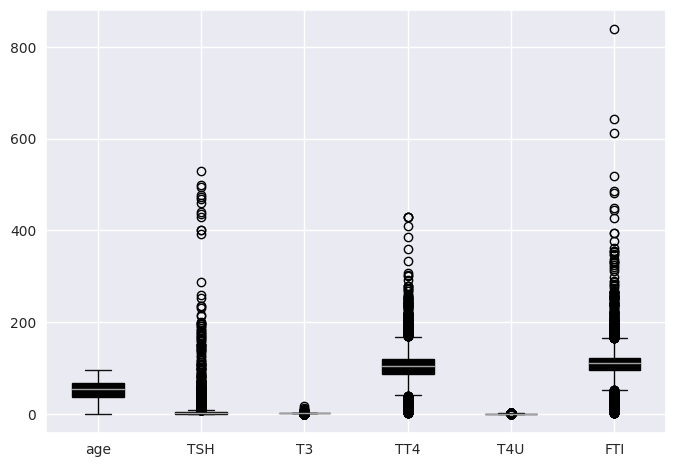

In [65]:
box = df.boxplot(column = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], patch_artist = True)

#### We decide not to remove outliers because we have no solid reason to do so. Since there will always be some variability in data especially related to health sector wherein we would always have some extremes which in this case is not something really important to be dropped off.

In [66]:
# replacing sex with binary 0 and 1
df.replace('F', 0, inplace = True)
df.replace('M', 1, inplace = True) 
df.replace('', np.nan , inplace = True)
df.dropna(subset = ['sex'], inplace = True)
df['sex'].value_counts()

0.0    4898
1.0    2394
Name: sex, dtype: int64

In [67]:
# replacing boolean strings with binary 0 and 1
df.replace('t', 1, inplace = True)
df.replace('f', 0, inplace = True)

In [68]:
dataset = df.copy()
dataset.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [69]:
#target mapping for Model
mapping_target = {'negative': 0 , 'hypothyroid': 1, 'hyperthyroid': 2}

dataset['target'] = df['target'].map(mapping_target) 
dataset['target'].value_counts()

0    6555
1     570
2     167
Name: target, dtype: int64

In [70]:
#dataset = dataset.astype({'sex':'float'})
# dataset.dtypes #= dataset.astype(float)
# dataset['sex']

In [71]:
X = np.array(dataset[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI']])
y = np.array(dataset[['target']])

In [72]:
#!pip install --upgrade patsy 
#!pip install statsmodels
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model_prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                              149.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:05:17   Log-Likelihood:                         -2623.5
No. Observations:                7292   AIC:                                      5287.
Df Residuals:                    7272   BIC:                                      5425.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0005      0.000      2.156      0.031    4.29e-05       0.001
x2            -0.0490      0.009     -5.469      0.000      -0.067      -0.031
x3            -0.1165      0.013     -8.801      0.000      -0.142      -0.091
x4            -0.0042      0.032     -0.133      0.894      -0.067       0.058
x5            -0.0340      0.037     -0.922      0.356      -0.106       0.038
x6            -0.0159      0.022     -0.737      0.461      -0.058       0.026
x7             0.0592      0.062      0.948      0.343      -0.063       0.181
x8            -0.0880      0.035     -2.548      0.011      -0.156      -0.020
x9             0.0369      0.030      1.217      0.224      -0.023       0.096
x10            0.0650      0.016      3.957      0.000       0.033       0.097
x11            0.1485      0.016      9.331      0.000       0.117       0.180
x12           -0.0050      0.038     -0.131      0.896      -0.080       0.070
x13           -0.0986      0.041     -2.413      0.016      -0.179      -0.018
x14            0.0492      0.026      1.901      0.057      -0.002       0.100
const      -2.164e-17   1.02e-17     -2.115      0.035   -4.17e-17   -1.58e-18
x15           -0.0892      0.019     -4.704      0.000      -0.126      -0.052
x16            0.0062      0.000     34.180      0.000       0.006       0.007
x17            0.1471      0.007     20.083      0.000       0.133       0.161
x18            0.0019      0.000      6.235      0.000       0.001       0.002
x19           -0.3611      0.022    -16.726      0.000      -0.403      -0.319
x20           -0.0005      0.000     -2.057      0.040      -0.001   -2.39e-05
==============================================================================
Omnibus:                     3917.317   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29122.002
Skew:                           2.516   Prob(JB):                         0.00
Kurtosis:                      11.398   Cond. No.                     1.05e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.84e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
# X_train, y_train = oversample.fit_resample(X, y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = None , shuffle = True)
skf.get_n_splits(X,y)
#StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  X_train , X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

#### Decision Tree

Accuracy using Decision Tree Classifier (%):
90.53497942386831


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       655
           1       1.00      0.02      0.03        57
           2       0.83      0.29      0.43        17

    accuracy                           0.91       729
   macro avg       0.91      0.44      0.47       729
weighted avg       0.91      0.91      0.87       729




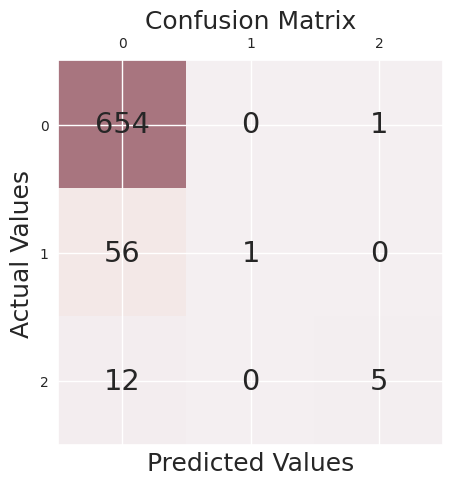



Mean squared error: 0.15
Coefficient of determination: 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


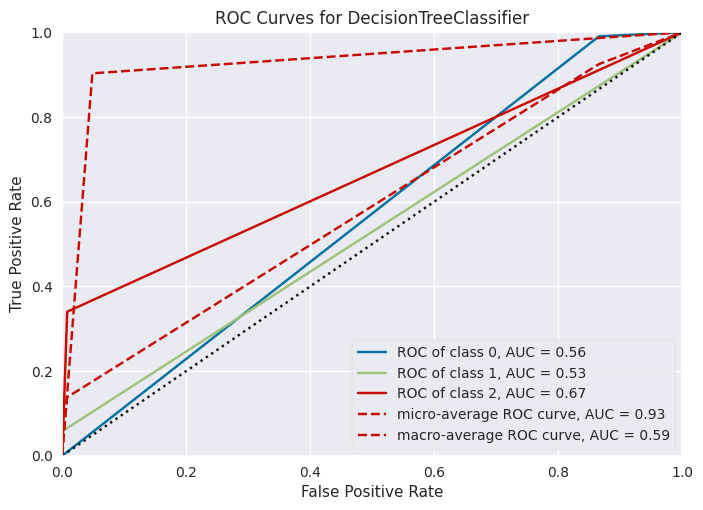

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [74]:
#!pip install yellowbrick
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced' , random_state = 0)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

import sklearn
print('Accuracy using Decision Tree Classifier (%):') 
Decision_Tree_acc = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print(Decision_Tree_acc)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha = 0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instaniate the classification model and visualizer
visualizer = ROCAUC(dt, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()                       

#### Support Vector Machine

Accuracy using Support Vector Machine (%):
89.84910836762688


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       655
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00        17

    accuracy                           0.90       729
   macro avg       0.30      0.33      0.32       729
weighted avg       0.81      0.90      0.85       729




Mean squared error: 0.17
Coefficient of determination: -0.10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


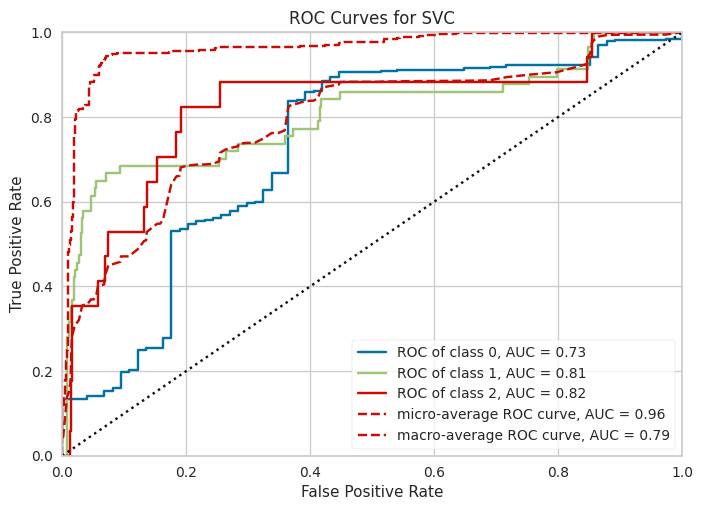

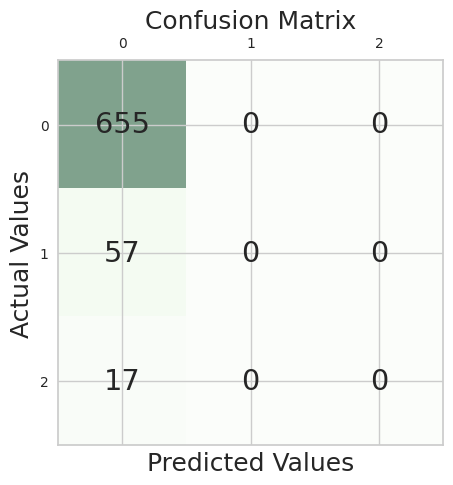

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
# X_train, y_train = oversample.fit_resample(X, y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = None , shuffle = True)
skf.get_n_splits(X,y)
#StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  X_train , X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
    
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
clf.fit(X, y) 
y_pred = clf.predict(X_test)

import sklearn
print('Accuracy using Support Vector Machine (%):') 
SVM_accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print(SVM_accuracy)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
        
print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Instaniate the classification model and visualizer
visualizer = ROCAUC(clf, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha = 0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Logistic Regression

Accuracy using Logistic Regression(%):
96.15912208504801


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       655
           1       0.92      1.00      0.96        57
           2       0.42      1.00      0.60        17

    accuracy                           0.96       729
   macro avg       0.78      0.99      0.84       729
weighted avg       0.98      0.96      0.97       729




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


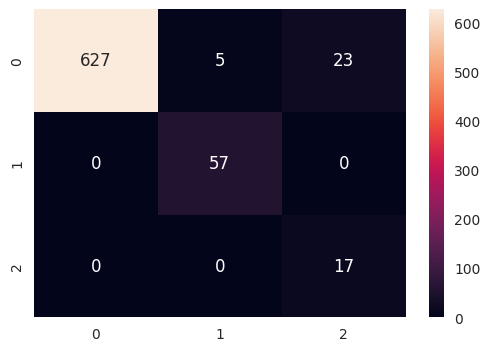



Mean squared error: 0.13
Coefficient of determination: 0.15


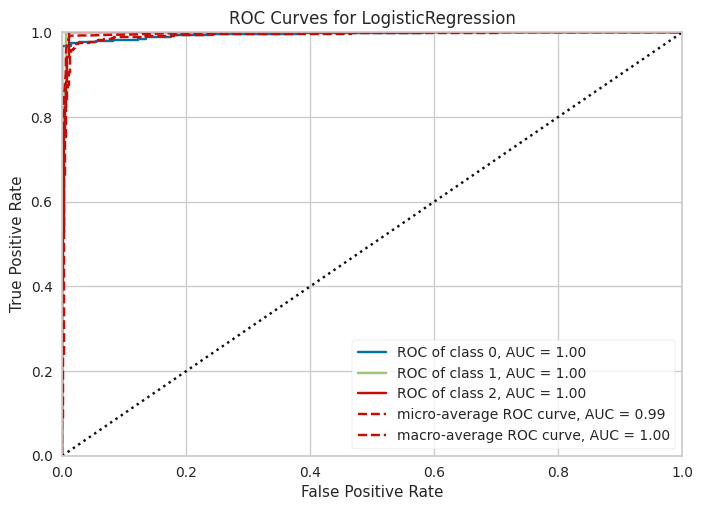

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
# X_train, y_train = oversample.fit_resample(X, y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = None , shuffle = True)
skf.get_n_splits(X,y)
#StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  X_train , X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
    
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
   
import sklearn
print('Accuracy using Logistic Regression(%):') 
LR_acc = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print(LR_acc)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='g')
plt.show()

print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Instaniate the classification model and visualizer
visualizer = ROCAUC(logreg, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()


#### Naive Bayes

Accuracy using Naive Bayes (%):
27.148080438756857


              precision    recall  f1-score   support

           0       0.98      0.20      0.33      1967
           1       0.28      0.88      0.43       171
           2       0.04      0.98      0.08        50

    accuracy                           0.27      2188
   macro avg       0.44      0.69      0.28      2188
weighted avg       0.91      0.27      0.33      2188




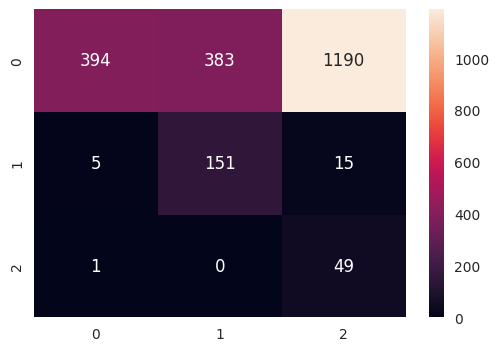



Mean squared error: 2.36
Coefficient of determination: -14.31


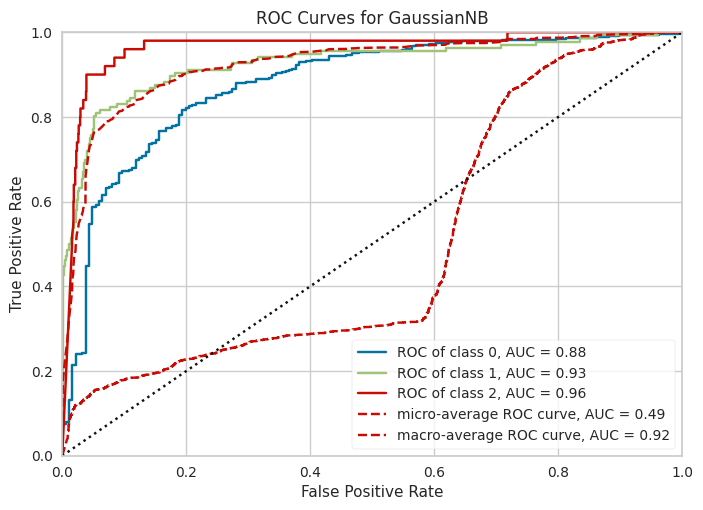

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)


from sklearn.naive_bayes import GaussianNB
naive= GaussianNB()
naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

import sklearn
print('Accuracy using Naive Bayes (%):') 
NB_acc = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print(NB_acc)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='g')
plt.show()
print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instaniate the classification model and visualizer
visualizer = ROCAUC(naive, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()    



#### Random Forest Algorithm

Accuracy of Random Forest Algorithm (%):
98.90260631001372


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       655
           1       1.00      0.98      0.99        57
           2       0.78      0.82      0.80        17

    accuracy                           0.99       729
   macro avg       0.92      0.93      0.93       729
weighted avg       0.99      0.99      0.99       729




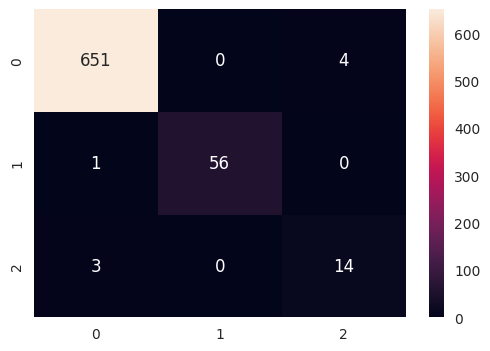



Mean squared error: 0.04
Coefficient of determination: 0.74


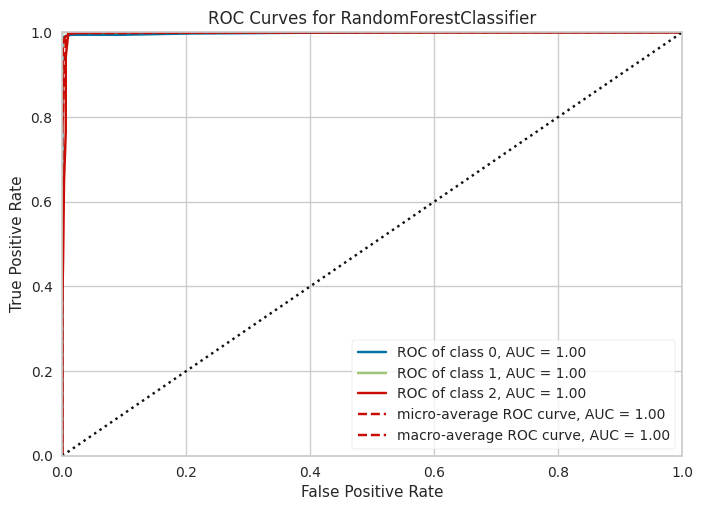

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = None , shuffle = True)
skf.get_n_splits(X,y)
#StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  X_train , X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
    

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Accuracy
import sklearn
print('Accuracy of Random Forest Algorithm (%):') 
RFA_acc = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print(sklearn.metrics.accuracy_score(y_test,y_pred)*100)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='g')
plt.show()
print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Instaniate the classification model and visualizer
visualizer = ROCAUC(classifier, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()

[0]	validation_0-mlogloss:0.95737	validation_1-mlogloss:0.95903
[1]	validation_0-mlogloss:0.84000	validation_1-mlogloss:0.84301
[2]	validation_0-mlogloss:0.74121	validation_1-mlogloss:0.74545
[3]	validation_0-mlogloss:0.65665	validation_1-mlogloss:0.66127
[4]	validation_0-mlogloss:0.58379	validation_1-mlogloss:0.58869
[5]	validation_0-mlogloss:0.52060	validation_1-mlogloss:0.52594
[6]	validation_0-mlogloss:0.46538	validation_1-mlogloss:0.47101
[7]	validation_0-mlogloss:0.41705	validation_1-mlogloss:0.42296
[8]	validation_0-mlogloss:0.37446	validation_1-mlogloss:0.38068
[9]	validation_0-mlogloss:0.33666	validation_1-mlogloss:0.34274
[10]	validation_0-mlogloss:0.30298	validation_1-mlogloss:0.30882
[11]	validation_0-mlogloss:0.27311	validation_1-mlogloss:0.27880
[12]	validation_0-mlogloss:0.24643	validation_1-mlogloss:0.25204
[13]	validation_0-mlogloss:0.22281	validation_1-mlogloss:0.22853
[14]	validation_0-mlogloss:0.20172	validation_1-mlogloss:0.20756
[15]	validation_0-mlogloss:0.18277	

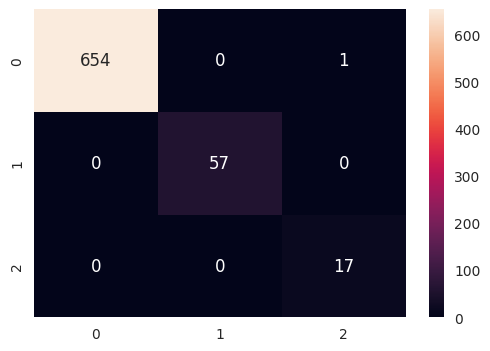



Mean squared error: 0.01
Coefficient of determination: 0.96


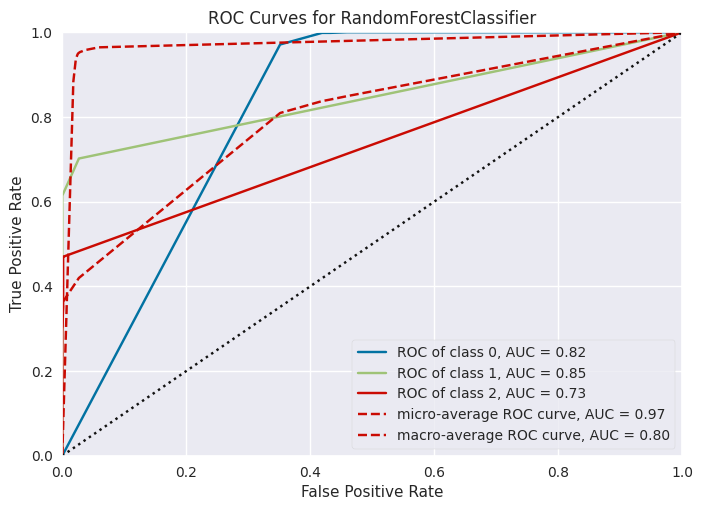

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = None , shuffle = True)
skf.get_n_splits(X,y)
#StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  X_train , X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
    
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

xgb_clf = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 3, learning_rate = 0.1)
xgb_clf.fit(X_train, y_train, sample_weight = compute_sample_weight(class_weight='balanced', y = y_train), 
            eval_set = [(X_train, y_train), (X_test, y_test)])

y_pred = xgb_clf.predict(X_test)
#Accuracy
import sklearn
print('Accuracy of XG Boost Algorithm (%):') 
XGB_acc = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print(XGB_acc)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='g')
plt.show()
print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Instaniate the classification model and visualizer
visualizer = ROCAUC(classifier, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()


#### Bagging Stratified K-fold

Bagging Cross Val Score is :
98.82065881203376


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       655
           1       0.04      0.04      0.04        57
           2       0.06      0.06      0.06        17

    accuracy                           0.81       729
   macro avg       0.33      0.33      0.33       729
weighted avg       0.81      0.81      0.81       729




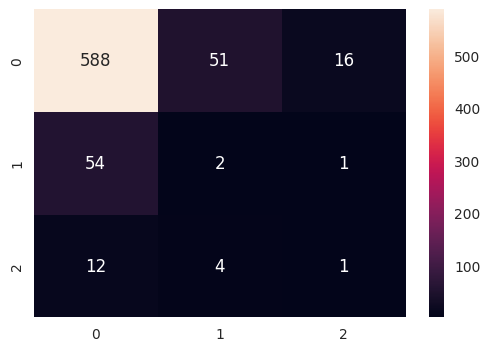



Mean squared error: 0.30
Coefficient of determination: -0.95


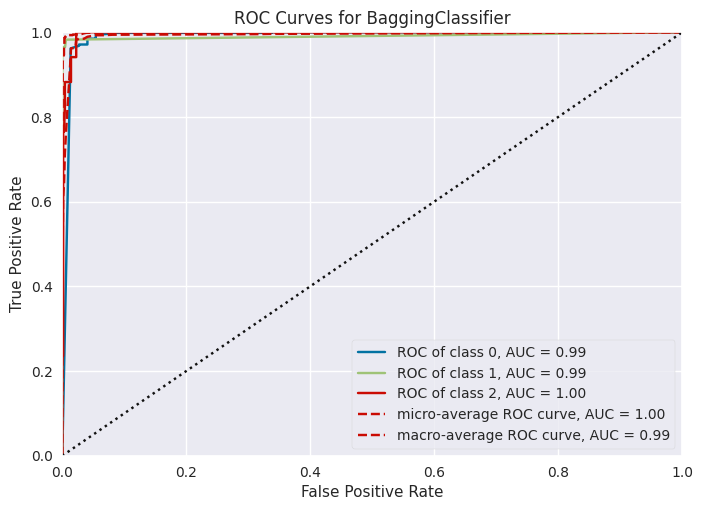

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [76]:
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , stratify = y)

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = {1: 6000, 2: 6000})
X_train, y_train = oversample.fit_resample(X, y)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = None , shuffle = True)
skf.get_n_splits(X,y)
#StratifiedKFold(n_splits = 10, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  X_train , X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
    

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
kfold = model_selection.KFold(n_splits = 10, random_state = None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Bagging Cross Val Score is :")
bagging_acc = results.mean()*100
print(results.mean()*100)
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='g')
plt.show()
print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Instaniate the classification model and visualizer
visualizer = ROCAUC(model, classes = [0,1,2])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)       
visualizer.show()

#### Ensemble Learning

Ensemble Learning Score is(%):
98.62825788751715
Accuracy of Ensemble Learning Algorithm is:  81.06995884773663
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       655
           1       0.04      0.04      0.04        57
           2       0.06      0.06      0.06        17

    accuracy                           0.81       729
   macro avg       0.33      0.33      0.33       729
weighted avg       0.81      0.81      0.81       729




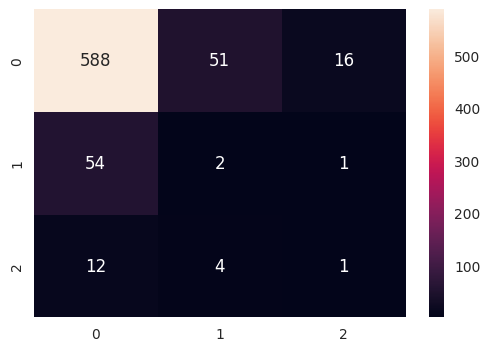



Mean squared error: 0.30
Coefficient of determination: -0.95


In [77]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators = [("Decision Tree", dt),("svm", clf),("logistic",logreg),("Bagging",cart), ("XGBoost",xgb_clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting = "hard")
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
print("Ensemble Learning Score is(%):")
ensemble_acc = (ensemble.score(X_test, y_test))*100
print (ensemble_acc)
en_acc = sklearn.metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy of Ensemble Learning Algorithm is: " ,en_acc)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt='g')
plt.show()
print('\n')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))  
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


#### Accuracy Comparison between different Models

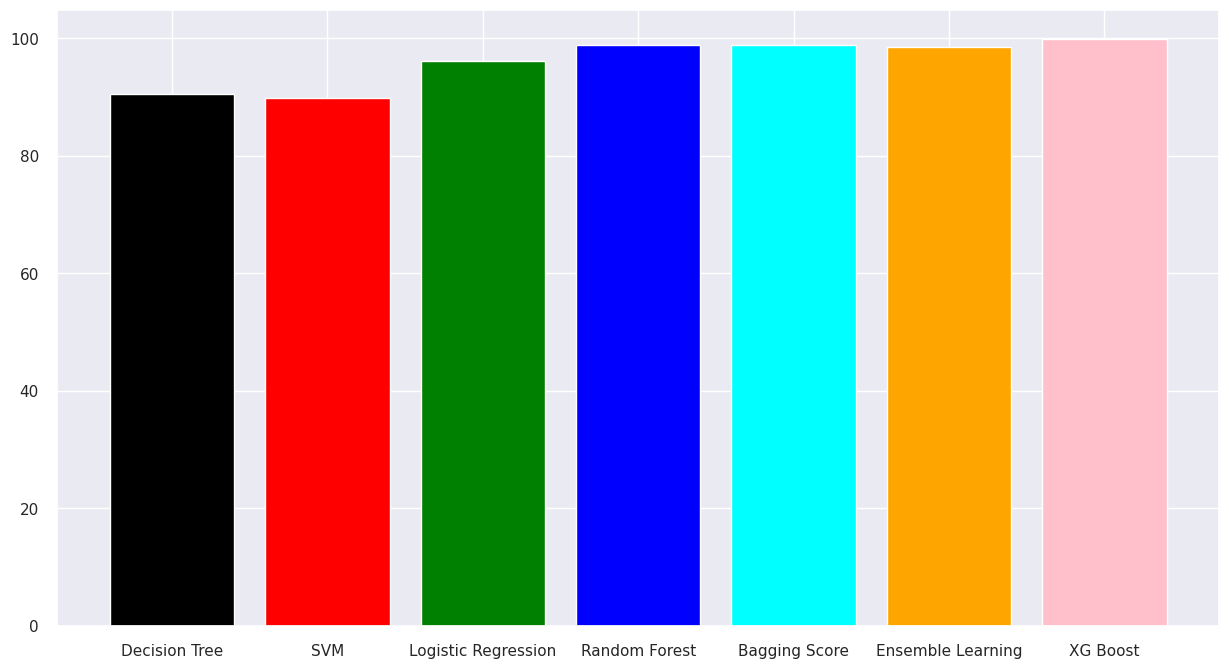

In [84]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [Decision_Tree_acc , SVM_accuracy , LR_acc ,  RFA_acc, bagging_acc , ensemble_acc, XGB_acc]
bars = ("Decision Tree","SVM","Logistic Regression","Random Forest", "Bagging Score", "Ensemble Learning", "XG Boost")
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan','orange','pink','purple'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [89]:
from scipy import stats
X = dataset[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI']]
y = dataset[['target']]

for i in X:
    print('Wilcoxon test result between Target variable and ' + str(i) + ' is: ' , stats.wilcoxon(y, X[[i]]))
    print('\n')

Wilcoxon test result between Target variable and age is:  WilcoxonResult(statistic=array([0.]), pvalue=array([0.]))


Wilcoxon test result between Target variable and sex is:  WilcoxonResult(statistic=array([999523.]), pvalue=array([8.80504652e-150]))


Wilcoxon test result between Target variable and on_thyroxine is:  WilcoxonResult(statistic=array([546065.]), pvalue=array([0.04974977]))


Wilcoxon test result between Target variable and query_on_thyroxine is:  WilcoxonResult(statistic=array([37518.]), pvalue=array([6.73848836e-100]))


Wilcoxon test result between Target variable and on_antithyroid_meds is:  WilcoxonResult(statistic=array([26527.5]), pvalue=array([6.21065554e-110]))


Wilcoxon test result between Target variable and sick is:  WilcoxonResult(statistic=array([102971.]), pvalue=array([4.24852392e-62]))


Wilcoxon test result between Target variable and pregnant is:  WilcoxonResult(statistic=array([8743.5]), pvalue=array([3.47091206e-128]))


Wilcoxon test result between